In [1]:
from ase_interface import ANIENS
from ase_interface import ensemblemolecule

import numpy as np
import ase

#from ase.neb import NEBtools
from ase.io import read, write

import matplotlib
import matplotlib as mpl

import matplotlib.pyplot as plt

van Der Waals correction will be unavailable. Please install ased3


In [2]:
ntdir = '/nh/nest/u/jsmith/scratch/Gits/ANI-Networks/networks/al_networks/ANI-AL-0808.0303.0400/'
cns = ntdir + 'train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
sae = ntdir + 'train0/sae_wb97x-631gd.dat'
nnf = ntdir + 'train'
Nn = 5

file = '/nh/nest/u/jsmith/Research/confs_test/aceclofenac.xyz'

In [3]:
mol = read(file)

In [4]:
# Set NC
aens = ensemblemolecule(cns, sae, nnf, Nn, 1)

# Set ANI calculator
mol.set_calculator(ANIENS(aens,sdmx=20000000.0))

In [5]:
mol.get_potential_energy()

-51520.40165594666

In [6]:
S = mol.get_chemical_symbols()

In [7]:
A3l = [np.zeros((0,5),dtype=np.float32)]
for i,s in enumerate(S): # iterate through atoms
    A0 = np.stack([nc.activations(i,0) for nc in aens.ncl]) # Layer 0 activations
    A1 = np.stack([nc.activations(i,1) for nc in aens.ncl]) # Layer 1 activations
    A2 = np.stack([nc.activations(i,2) for nc in aens.ncl]) # Layer 2 activations
    A3 = np.concatenate([nc.activations(i,3) for nc in aens.ncl]) # Layer 3 activations (Pre energy accumulation)
    A3l.append(A3)
    print(s,A3)
A3l = np.vstack(A3l)

O [-0.17514905 -0.17730989 -0.16943449 -0.16485274 -0.18030572]
C [-0.27815363 -0.27991694 -0.2816273  -0.28210393 -0.2771784 ]
O [-0.16913158 -0.17084207 -0.17026082 -0.1674123  -0.17430693]
C [-0.27394295 -0.29767734 -0.30103213 -0.27326727 -0.2973348 ]
O [-0.16072369 -0.15755674 -0.15380198 -0.15431134 -0.15671843]
C [-0.2826143  -0.28247496 -0.28746146 -0.28598678 -0.2799451 ]
O [-0.16919096 -0.16847879 -0.16509295 -0.16523722 -0.16963676]
C [-0.28189638 -0.30374673 -0.30373305 -0.27547392 -0.3015604 ]
C [-0.26813054 -0.26728055 -0.27212054 -0.2671841  -0.2719256 ]
C [-0.27186993 -0.2827725  -0.28308696 -0.26894367 -0.28132853]
C [-0.27028033 -0.28045636 -0.28158015 -0.26813123 -0.28038615]
C [-0.27072474 -0.28041294 -0.28242624 -0.26832724 -0.2805674 ]
C [-0.2700754  -0.2810495  -0.28137714 -0.26740247 -0.279706  ]
C [-0.27617058 -0.27582082 -0.27985233 -0.28031927 -0.27943277]
N [-0.16444066 -0.17845783 -0.17400205 -0.1513691  -0.18001965]
C [-0.27096072 -0.2710321  -0.2749874  -

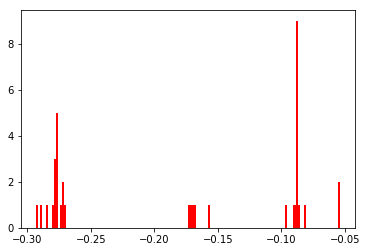

In [11]:
#plt.hist(A3l[:,0],bins=150,color='red')
#plt.hist(A3l[:,1],bins=150,color='blue')
#plt.hist(A3l[:,2],bins=150,color='green')
#plt.hist(A3l[:,3],bins=150,color='orange')
#plt.hist(A3l[:,4],bins=150,color='grey')
plt.hist(np.mean(A3l,axis=1),bins=150,color='red')
plt.show()

In [12]:
for i,h in zip(A3l,np.mean(A3l,axis=1)):
    

[-0.17341039 -0.27979603 -0.17039074 -0.2886509  -0.15662244 -0.2836965
 -0.16752732 -0.2932821  -0.26932827 -0.27760032 -0.27616683 -0.2764917
 -0.27592212 -0.27831918 -0.16965786 -0.27265435 -0.2717349  -0.05408977
 -0.2761769  -0.27733484 -0.27601013 -0.27205005 -0.05355731 -0.08090129
 -0.08783095 -0.0878498  -0.08873744 -0.08797231 -0.08685459 -0.08748599
 -0.08738475 -0.08751033 -0.09562524 -0.08749177 -0.0873287  -0.08747572]
